# Detect Heart Disease using patient data.
Explore the data, understand the features, and figure out an approach.

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Unified mentors/Heart_Disease.csv')

In [ ]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


* units(), dtypes()
* Age= units(in years), dtypes(Numeric)
* Sex= units(0-f, 1-m), dtypes(Binary)

* Chest pain type(1-typical angina, 2-atypical angina, 3-non anginal pain, 4- asymptomatic), dtpes(Nominal)
* Resting blood pressure((resting bp s)- in mm Hg), dtypes(Numeric)
* Serum cholesterol (in mg/dl), dtpes(Numeric)
* Fasting blood sugar (1 = sugar > 120mg/dL & 0 = sugar < 120mg/dL), dtypes(Binary)
* Resting electrocardiogram results(resting ecg, 0-normal, 1 ST-T wave abormality, 2- Probable or Defnite Left venticular hypertropy by Estes' criteria),  dtpes(Nominal)
* Maximun heart rate achived(max heart rate, 71-202), dtypes(Numeric)
* Exercise induced angina(exercise angina, 0 = no, 1 = yes), dypes(Binary)
* oldpeak =ST(oldpeak, depression), dypes(Numeric)
* the slope of the peak exercise ST segment(ST slope, 1 = upward 2 = flat, 3 = downward ) dtpes(Nominal)
* class (target, 0 = Normal, 1 = Heart Disease), dtpes(Binary)

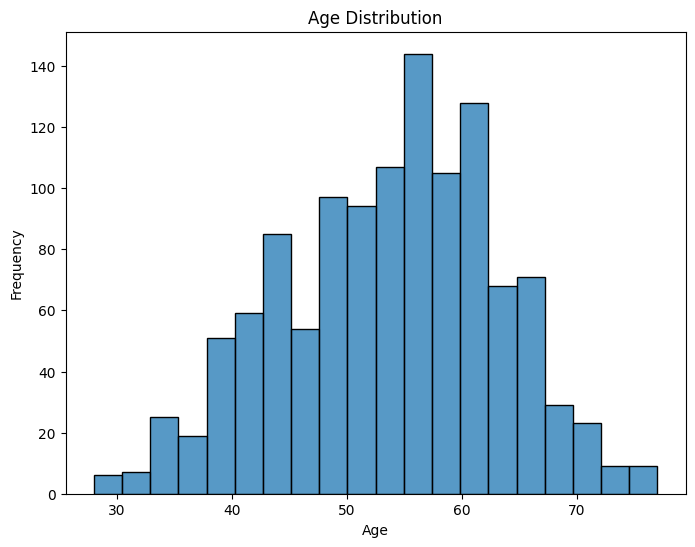

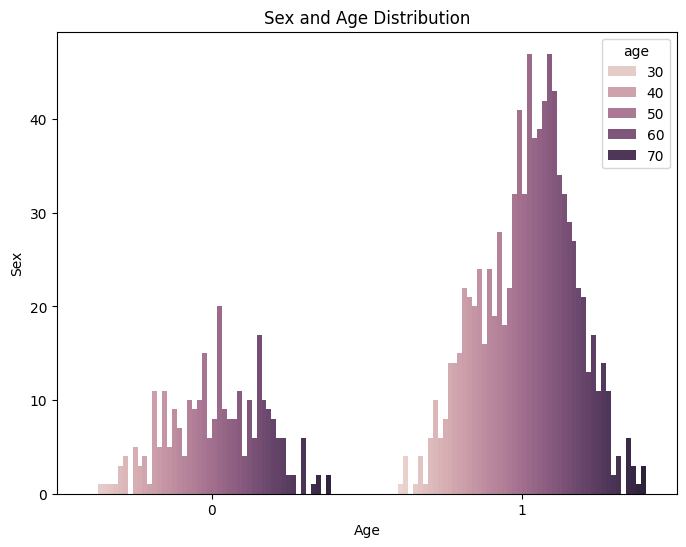

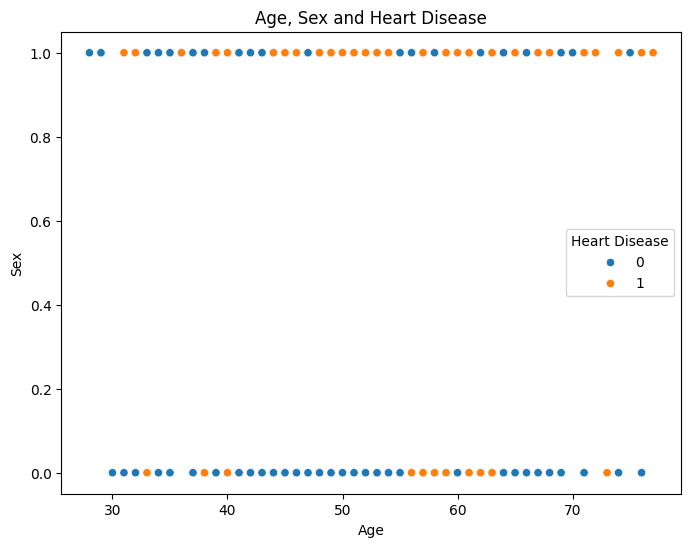

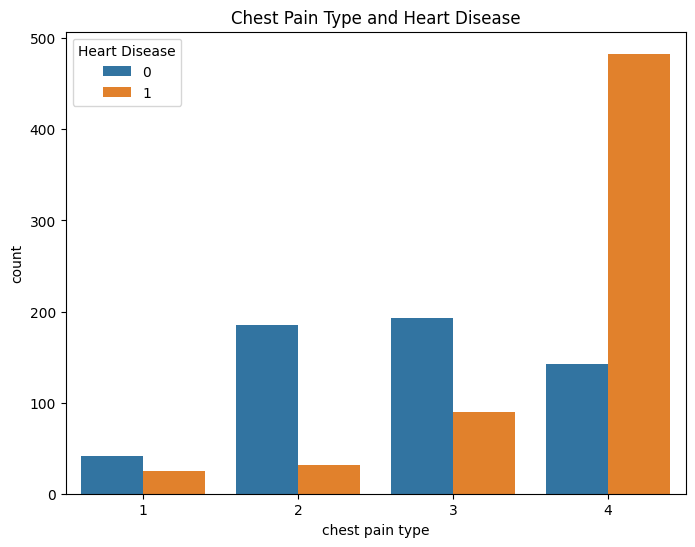

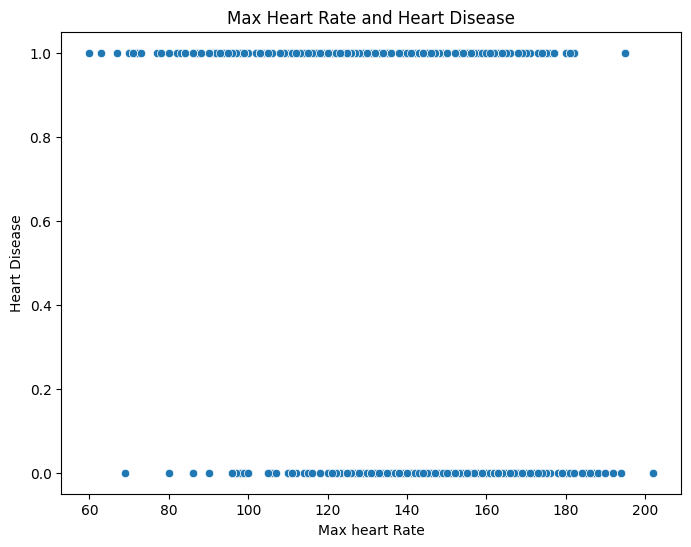

In [ ]:
# Visualize the age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualise the sex and age distribution
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='age', data=df)
plt.title('Sex and Age Distribution')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# Visualise the age, sex and heart disease
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='sex', hue='target', data=df)
plt.title('Age, Sex and Heart Disease')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend(title='Heart Disease') # Added a legend title to explain the color coding for heart disease.
plt.show()

# visualise the type chestpain type and heart diesease
plt.figure(figsize=(8,6))
sns.countplot(x='chest pain type', hue='target', data=df)
plt.title('Chest Pain Type and Heart Disease')
plt.xlabel('chest pain type')
plt.ylabel('count')
plt.legend(title='Heart Disease')
plt.show()
# visualise max heart rate and heart disease
plt.figure(figsize=(8,6))
sns.scatterplot(y='target', x='max heart rate', data=df)
plt.title('Max Heart Rate and Heart Disease')
plt.xlabel('Max heart Rate')
plt.ylabel('Heart Disease')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Split the data into training and testing sets
X=df.drop('target', axis=1)
y=df['target']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)



In [ ]:
# Create and fit scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
# train a random forest classifier on the scaled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make prediction on the scaled testing data
y_pred = clf.predict(X_test_scaled)

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
c_f = classification_report(y_test, y_pred)
c_M = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Classification Report:\n{c_f}')
print(f'Confusion Metrics:\n{c_M}')


Accuracy: 0.945
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

Confusion Metrics:
[[ 98   9]
 [  4 127]]


In [ ]:
# Define the hyperParameter space
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5,10,15,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,5,10]
}

In [ ]:
# Define the  cross_validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomised search with cross-validation
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_grid, cv=cv, scoring='accuracy', n_iter=10)
random_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [ ]:
# Print the best hyperparameters and corresponding accuracy
print('Best Hyperparameter:', random_search.best_params_)
print('Best Accuracy:', accuracy)

Best Hyperparameter: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy: 0.9453781512605042


In [ ]:
# Train a new model with the best hyperparameters and evaluate it on the test set
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9453781512605042


In [ ]:

# save prediction with price_range
submission_df= pd.DataFrame({'Heart Disease': y_pred})
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.shape

(238, 1)

In [ ]:
from google.colab import files

# Download the file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model deployment is the process of integrating a trained machine learning model into a larger application or system, making it available for use in production environments.

Here are the general steps involved in model deployment:

1. Model Serialization: Save the trained model to a file using a serialization format such as Pickle, Joblib, or TensorFlow's SavedModel format.

2. Model Serving: Set up a model serving platform, such as TensorFlow Serving, AWS SageMaker, or Azure Machine Learning, to manage and deploy the model.

3. API Development: Create a RESTful API or a web application that interacts with the deployed model, allowing users to send input data and receive predictions.

4. Containerization: Package the model and API into a container using Docker, Kubernetes, or other containerization tools.

5. Cloud Deployment: Deploy the containerized model and API to a cloud platform, such as AWS, Azure, Google Cloud, or IBM Cloud.

6. Monitoring and Maintenance: Continuously monitor the model's performance, update the model as new data becomes available, and retrain the model as necessary.

Some popular tools and platforms for model deployment include:

- TensorFlow Serving
- AWS SageMaker
- Azure Machine Learning
- Google Cloud AI Platform
- IBM Cloud Machine Learning
- Docker
- Kubernetes
- Flask
- Django

What specific aspect of model deployment would you like to know more about?

Now that we have deployed our machine learning model using Flask, let's discuss some next steps:

Model Monitoring and Maintenance

1. Model Performance Monitoring: Continuously monitor the model's performance on new data to ensure it remains accurate and reliable.
2. Model Updates and Retraining: Regularly update the model with new data to maintain its accuracy and adapt to changing patterns.
3. Model Versioning: Use version control to track changes to the model and ensure reproducibility.

Model Scaling and Optimization

1. Horizontal Scaling: Scale the model horizontally by adding more instances or containers to handle increased traffic.
2. Vertical Scaling: Scale the model vertically by increasing the resources (e.g., CPU, memory) allocated to the model.
3. Model Pruning and Quantization: Optimize the model by pruning unnecessary weights and quantizing the model to reduce computational requirements.

Model Security and Explainability

1. Model Security: Implement security measures to protect the model from adversarial attacks and data breaches.
2. Model Explainability: Use techniques such as feature importance, partial dependence plots, and SHAP values to explain the model's predictions.

Which of these next steps would you like to explore further?